In [14]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pydmd as dmd
import h5py
from scipy.interpolate import griddata
from scipy import stats

In [11]:
with h5py.File('GeonetPosArray1996-2018.mat', 'r') as file:
    data = {}
    data["date"] = np.array(file["sdate"]).T
    data["day"] = np.array(file["sday"]).T
    data["hgt"] = np.array(file["shgt"]).T
    data["lat"] = np.array(file["slat"]).T
    data["lon"] = np.array(file["slon"]).T
    data["month"] = np.array(file["smonth"]).T
    data["name"] = np.array(file["sname"]).T
    data["x"] = np.array(file["sx"]).T
    data["y"] = np.array(file["sy"]).T
    data["year"] = np.array(file["syear"]).T
    data["z"] = np.array(file["sz"]).T

n_stations, n_times = data["date"].shape
time_idx = 4000

In [12]:
def show_grids(data):
    for key in data.keys():
        if key != "name":
            plt.matshow(data[key])
            plt.title(key)

In [21]:
# Interpolate data onto regular grid
n_bins = 30
lon_min = 125.0
lon_max = 150.0
lat_min = 30.0
lat_max = 50.0
lon_vec = np.linspace(lon_min, lon_max, n_bins)
lat_vec = np.linspace(lat_min, lat_max, n_bins)

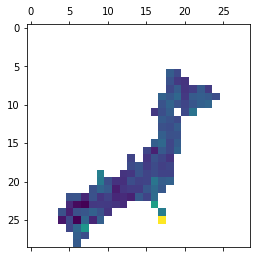

In [30]:
def plot_grid(field, time_idx):
    lon = data["lon"][:, time_idx]
    lat = data["lat"][:, time_idx]
    values = data["y"][:, time_idx]
    return stats.binned_statistic_2d(lon, lat, values, 'mean', bins=[lon_vec, lat_vec])[0]
    
grid1 = plot_grid("y", 5000)
grid2 = plot_grid("y", 5001)
plt.matshow(np.rot90(grid1 - grid2))

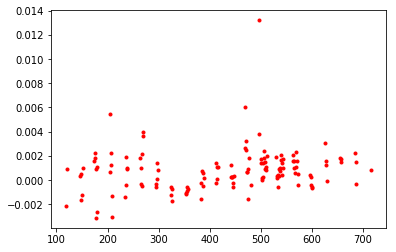

In [31]:
plt.plot(grid1.flatten()-grid2.flatten(), ".r")